# Докукин Дмитрий Владимирович

### Вариант 7

### 18-ИВТ-2

### Набор данных: 1, Классификаторы: 2, 3

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных


cap-shap - Форма шляпки  
cap-surface - Поверхность шляпки  
cap-color - Цвет шляпки  
bruises - Пятна  
odor - Запах  
gill-attachment - Форма жабер  
gill-spacing - Расстояние между жабрами  
gill-size - Размер жабер  
gill-color - Цвет жабер  
stalk-shape - Форма ножки  
stalk-root - Корень  
stalk-surface-above-ring - Форма ножки выше юбки  
stalk-surface-below-ring - Форма ножки ниже юбки  
stalk-color-above-ring - Цвет ножки выше юбки  
stalk-color-below-ring - Цвет ножки ниже юбки  
veil-type - Форма юбки  
veil-color - Цвет юбки  
ring-number - Количество колец  
ring-type - Тип кольца  
spore-print-color - Цвет спор  
population - Популяция  
habitat - Среда обитания  

In [32]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
%matplotlib inline
warnings.simplefilter('ignore')

In [33]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [34]:
train_data = pd.read_csv("mushrooms.csv")
train_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [35]:
train_data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

veil-type удаляем, тк оно не изменяется

In [36]:
train_data = train_data.drop(columns='veil-type')
train_data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [37]:
print("До удаление дубликатов: %d" % len(train_data))
train_data.drop_duplicates(keep="first", inplace=True)
print("После удаление дубликатов: %d" % len(train_data))

До удаление дубликатов: 8124
После удаление дубликатов: 8124


### 3.	Оцените сбалансированность данных по классам. Используйте полученную информацию при выборе метрики оценки качества классификации

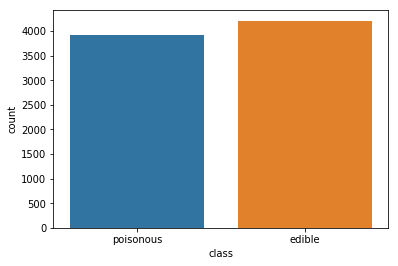

In [38]:
sns.barplot(data=pd.DataFrame({
    'count': [
        len(train_data.loc[train_data["class"] == 'p']),
        len(train_data.loc[train_data["class"] == 'e']),
    ],
    'class': [
        'poisonous',
        'edible',
    ],
}), y='count', x='class')

Классы сбалансированы

### 4. Выполните масштабирование количественных признаков

Поскольку в данном наборе данных нету количественных признаков, масштабирование не требуется

### 5. Выполните замену категориальных признаков

In [39]:
for column in list(train_data):
    train_data[column] = pd.Series(label_encoder.fit_transform(train_data[column]))
train_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

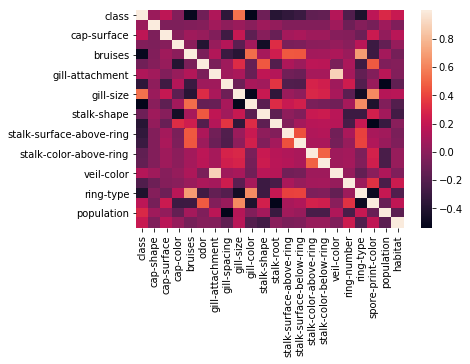

In [40]:
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix)

### 7.	Заполните пропущенные значения в данных

In [41]:
train_data.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

Пропусков нет

### 8. Решите поставленную задачу классификации в соответствии с заданием

In [42]:
X, y = train_data.drop(('class'), axis=1), train_data['class']
feature_names = X.columns
print(feature_names)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

### 2 - классификатор (К ближайших соседей по радиусу)

In [62]:
rnc = RadiusNeighborsClassifier()
params = {'radius': [4, 5, 6],
          'weights': ['uniform', 'distance']}

In [63]:
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)

GridSearchCV(estimator=RadiusNeighborsClassifier(),
             param_grid={'radius': [4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [64]:
r = rnc_grid.best_estimator_.radius
rnc = RadiusNeighborsClassifier(radius=r)
rnc.fit(X_train, y_train)
y_score = rnc.predict(X_test)
print('Best: %.7f'%(rnc_grid.best_score_))

Best: 0.9882161


### 3 - классификатор (линейный)

In [82]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 50)],
}, n_jobs=-1)
search.fit(X_train, y_train)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(X_train, y_train)
ppn_predict = ppn.predict(X_test)
print('Accuracy ppn: %.5f' % accuracy_score(y_test, ppn_predict))

best: 0.9340468318409529 alpha: 0.05263157894736842 max_iter: 10
Accuracy ppn: 0.94053


### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы

In [83]:
y_test_inversion = [1-y for y in y_test]

rnc_proba = rnc.predict_proba(X_test)

cppn = CalibratedClassifierCV(ppn, cv=10)
cppn.fit(X_train, y_train)
ppn_proba = cppn.predict_proba(X_test)

### PR - кривые

In [84]:
def Pr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

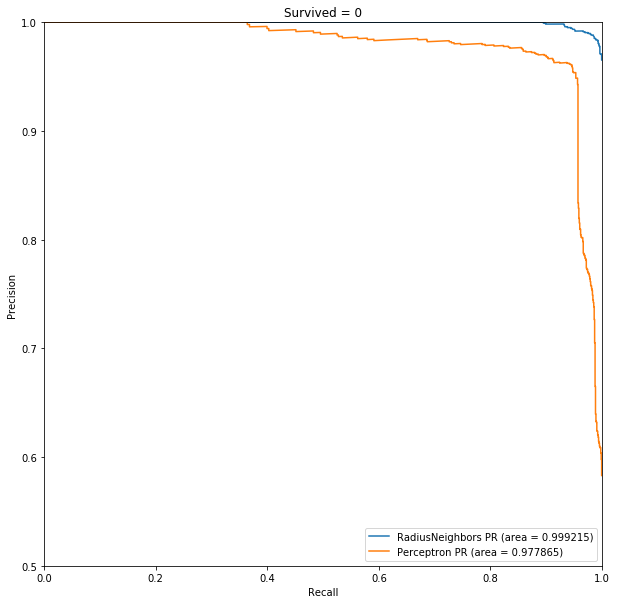

In [85]:
plt.figure(figsize=(10,10))

Pr(rnc_proba, 0, 'RadiusNeighbors', y_test_inversion)
Pr(ppn_proba, 0, 'Perceptron', y_test_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.5, 1.0])
plt.title('Survived = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

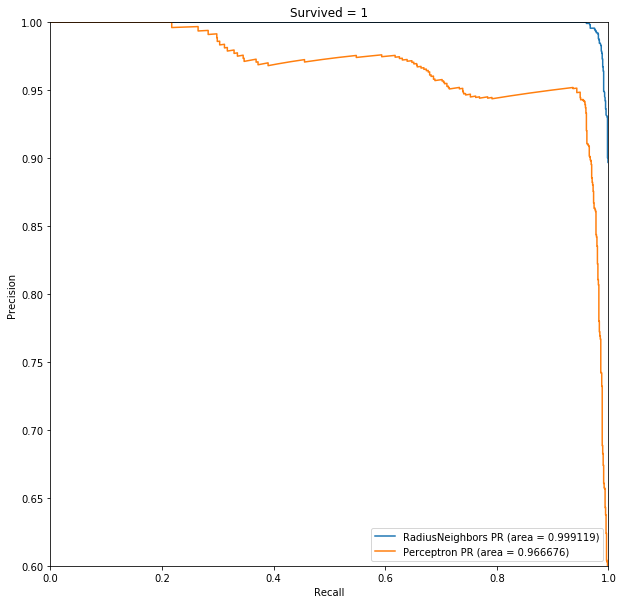

In [90]:
plt.figure(figsize=(10,10))

Pr(rnc_proba, 1, 'RadiusNeighbors', y_test)
Pr(ppn_proba, 1, 'Perceptron', y_test)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.6, 1.0])
plt.title('Survived = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

### ROC - кривые

In [91]:
def Roc0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

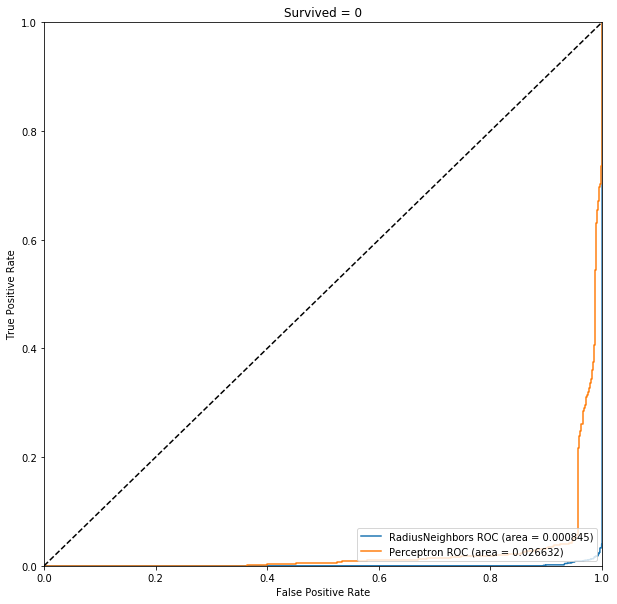

In [92]:
plt.figure(figsize=(10,10))

Roc0(rnc_proba, 'RadiusNeighbors', y_test_inversion)
Roc0(ppn_proba, 'Perceptron', y_test_inversion)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Survived = 0')
plt.show()

In [93]:
def Roc1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))


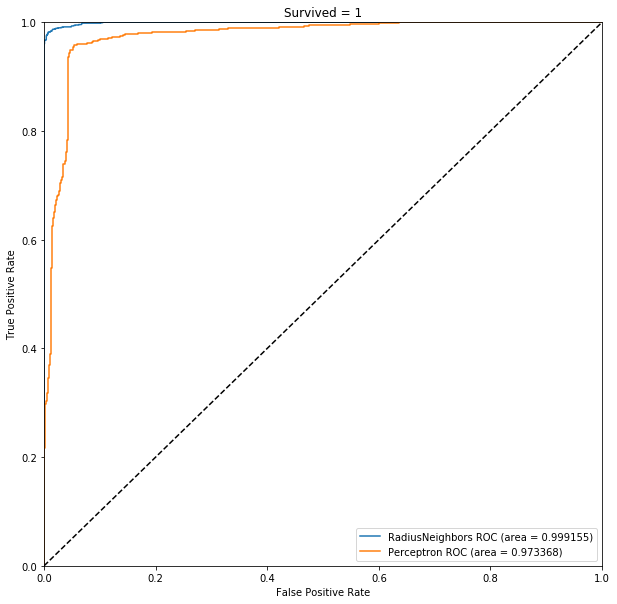

In [94]:
plt.figure(figsize=(10,10))

Roc1(rnc_proba, 'RadiusNeighbors', y_test)
Roc1(ppn_proba, 'Perceptron', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Survived = 1')
plt.show()